<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/ecuacion_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuacion del calor

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from typing import Callable, Tuple

Vamos a trabajar con la ecuación del calor que está en el ejercicio 7 y 8 de la práctica 3:

$$
\begin{cases}
    u_t(x,t) = \alpha u_{xx}(x,t) \quad &x\in(0,1) t>0\\
    u(x,0) = u_0(x) \quad &x\in[0,1]\\
    u(0,t) = u(1,t)=0 &t>0\\
\end{cases}
$$

donde tomamos $\alpha=1$

Vimos que el problema puede aproximarse de manera discreta con un esquema explícito de paso temporal $k$ y espacial $h$.

$$U_i^{j+1} = (1-2r)U_i + r(U_{i-1}+U_{i+1})$$

donde $r=\frac{k}{h^2}$

A su vez podemos escribir matricialmente el esquema

$$U^{j+1}=AU^j$$

Vamos a trabajar con una práctica muy recomendable para programar, que es escribir pequeñas funciones que hagan tareas específicas de nuestro programa general, modularizando el problema.

1) Armemos una función que construya la matriz A

In [3]:
def matriz_evolucion(N: int, r: float, alpha: float = 1.) -> np.ndarray:
    ''' Construye la matriz de evolución de la ecuacion del calor para la discretización forward en t y centradas en x.'''
    # Me armo las MATRICES que solo tienen elementos en la diagonal
    diagonal = (1-2*r) * np.eye(N)
    diagonal_superior = r * np.eye(N, k=1)
    diagonal_inferior = r * np.eye(N, k=-1)
    return diagonal + diagonal_inferior + diagonal_superior

Podemos probar si nuestra función anda bien con un ejemplo:

In [ ]:
A = matriz_evolucion(4, 0.1)
print(A)

[[0.8 0.1 0.  0. ]
 [0.1 0.8 0.1 0. ]
 [0.  0.1 0.8 0.1]
 [0.  0.  0.1 0.8]]


2) Vamos a armar una función que genere una condicion inicial.

Probar con una solución inicial deltiforme (un pincho): Todos los valores son valen 0, salvo un valor intermedio que vale 1. Probar para distintos valores intermedios

In [4]:
def pincho(x: np.ndarray) -> float:
    Nx = x.size
    u0 = np.zeros(Nx)
    u0[Nx//2] = 1
    return u0

In [5]:
def integrar(t0: float, tf: float, k: float, h: float, L: float, u0: Callable) -> Tuple[np.ndarray,np.ndarray,np.ndarray]:
    # Calculo la cantidad de puntos en la grilla
    Nx = int(L/k)+1
    Nt = int((tf-t0)/h)+1

    # Me guardo lugar para mi solución
    u = np.empty((Nx, Nt))

    # Escribo los valores que delimitan mi grilla
    t = np.linspace(t0, tf, Nt)
    x = np.linspace(0, L, Nx)
    # Obtengo mi matriz de evolucion
    A = matriz_evolucion(Nx,(h/k**2))

    # Pongo la condicion inicial
    u[:,0] = u0(x)
    u[0,:] = 0
    u[-1,:] = 0

    for i in range(Nt-1):
    #for n in range(1,Nt-1):
            #u[i, n] = (1-2*(k/(h**2))) *u[i, n - 1] +  (k/(h**2))* (u[i + 1, n - 1] + u[i - 1, n - 1])
            u[:,i+1] = A @ u[:,i]
    return (t, x, u)

Vamos a resolver el sistema para una línea de tamaño 100.

In [6]:
# Parametros del problema
L = 1 # Tamaño de la varilla
t0 = 0 # tiempo inicial
tf = 0.5 # Tiempo final

# Parametros del método
h = 0.01
k = np.sqrt(3*h)

def u0(x):
    return pincho(x)

t, x, u = integrar(t0, tf, k, h, L, u0)
print(u)

[[0.         0.         0.         0.03703704 0.04938272 0.05761317
  0.06035665 0.0608139  0.05974699 0.0578672  0.05551322 0.05291086
  0.0501956  0.04745588 0.04474877 0.0421115  0.0395678  0.0371322
  0.03481284 0.03261332 0.03053416 0.02857366 0.02672869 0.0249951
  0.02336817 0.0218428  0.02041377 0.01907581 0.01782373 0.01665248
  0.01555718 0.01453315 0.01357597 0.0126814  0.01184545 0.01106438
  0.01033462 0.00965287 0.00901598 0.00842105 0.00786531 0.00734621
  0.00686133 0.00640844 0.00598542 0.00559031 0.00522128 0.00487659
  0.00455466 0.00425397 0.00397314]
 [0.         0.         0.11111111 0.11111111 0.12345679 0.12345679
  0.12208505 0.11842707 0.1138546  0.10867246 0.10321936 0.09767594
  0.09217204 0.08679044 0.08158573 0.0765919  0.07182882 0.0673063
  0.06302713 0.05898915 0.05518683 0.0516124  0.04825661 0.0451094
  0.04216024 0.03939852 0.03681367 0.03439539 0.0321337  0.03001905
  0.02804229 0.02619475 0.02446822 0.02285497 0.02134767 0.01993949
  0.01862398 0.0

Para graficar podemos graficar una solución intermedia:

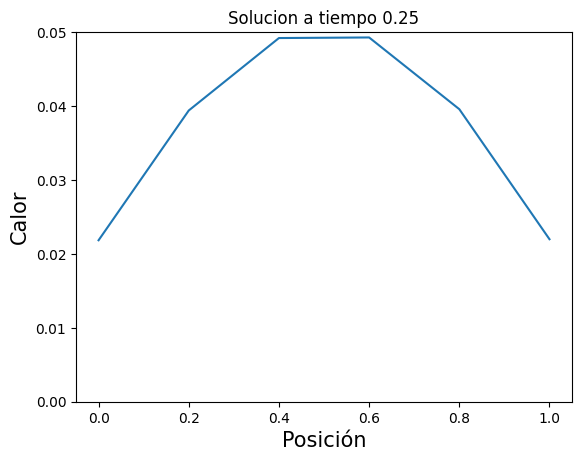

In [7]:
fig, ax = plt.subplots()

i = 25
ax.plot(x, u[:,i])
ax.set_title(f'Solucion a tiempo {t[i]}')
ax.set_xlabel('Posición',size=15)
ax.set_ylabel('Calor',size=15)
ax.set_ylim((0,0.05))
plt.show()

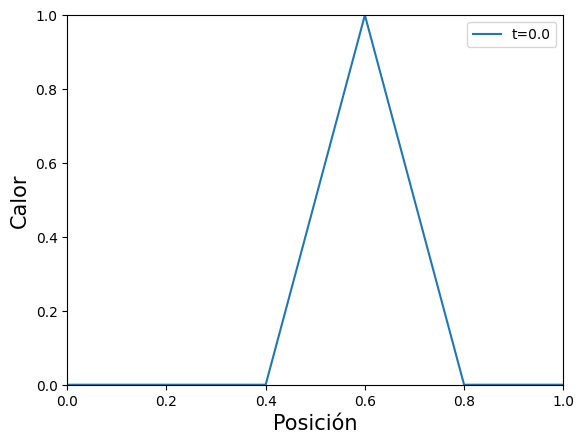

In [8]:
def AnimationFunction(frame: int):
  # grafico la curva en ese tiempo
  lines.set_data(x, u[:,frame])
  ax.legend(['t='+str(np.round(t[frame],4))])
fig, ax = plt.subplots()
ax.set_xlabel('Posición',size=15)
ax.set_ylim(0,np.max(u))
ax.set_xlim(0,L)
ax.set_ylabel('Calor',size=15)
lines, = ax.plot([],[],color='tab:blue')

anim_created = FuncAnimation(fig, AnimationFunction,frames=u.shape[1])
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

# B)
Si consideramos el problema con condiciones de bordes:

$$u(0,t)=g_1(t)\\
u(1,t)=g_2(t)\\
$$

Vimos que el problema se resuelve matricialmente como

$$ U^{j+1}=AU^j+G_j$$

Donde $G_j=(\frac{h \alpha}{k^2} g_1(jh),0,...,0,\frac{h \alpha}{k^2} g_2(jh))$

Modificar el programa anterior para que pueda incorporarse condiciones de borde al problema, suponiendo que estas son constantes.

In [9]:
def vector_borde(t: float, r: float, Nx: int, g1: Callable, g2: Callable, alpha: float=1) -> np.ndarray:
    borde = np.zeros(Nx)
    borde[0] = (r*alpha)*g1(t)
    borde[-1] = (r*alpha)*g2(t)
    return borde

In [10]:
def integrar(t0: float, tf: float, k: float, h: float, L: float, u0: Callable, g1: Callable, g2: Callable, alpha: float = 1) -> Tuple[np.ndarray,np.ndarray,np.ndarray]:
    # Calculo la cantidad de puntos en la grilla
    Nx = int(L/k)
    Nt = int((tf-t0)/h)

    r = h/np.square(k)
    # Me guardo lugar para mi solución
    u = np.empty((Nx, Nt))

    # Escribo los valores que delimitan mi grilla
    t = np.linspace(t0, tf, Nt)
    x = np.linspace(0, L, Nx)
    A = matriz_evolucion(Nx,r)

    # Pongo la condicion inicial
    u[:,0] = u0(x)

    for i in range(Nt-1):
        G = vector_borde(t[i], r, Nx, g1, g2, alpha=alpha)
        u[:,i+1] = A @ u[:,i] + G
    return (t, x, u)

In [11]:
def g1(t):
    return np.sin(t)
def g2(t):
    return np.sin(2*t)

In [12]:
t, x, u = integrar(t0, tf, k, h, L, u0, g1, g2)
t = np.linspace(t0, tf, int((tf-t0)/h))
for i in range(int((tf-t0)/h)-1):
        G = vector_borde(t[i],np.sqrt(3*h)/(0.001)**2, int(1/np.sqrt(3*h)), g1, g2, 1)

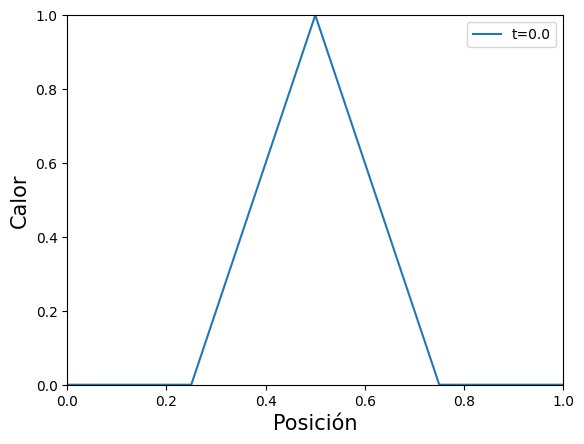

In [13]:
def AnimationFunction(frame: int):
  # grafico la curva en ese tiempo
  lines.set_data(x, u[:,frame])
  ax.legend(['t='+str(np.round(t[frame],4))])
fig, ax = plt.subplots()
ax.set_xlabel('Posición',size=15)
ax.set_ylim(0,np.max(u))
ax.set_xlim(0,L)
ax.set_ylabel('Calor',size=15)
lines, = ax.plot([],[],color='tab:blue')

anim_created = FuncAnimation(fig, AnimationFunction,frames=u.shape[1])
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

# C)
Modificar el programa considerando una fuente como en el ejercicio 8.

In [16]:
def fuente(x,t):
  return t(1-t)
def integrar_fuente(t0: float, tf: float, k: float, h: float, L: float, u0: Callable, f: Callable) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    # Calculo la cantidad de puntos en la grilla
    Nx = int(L / k) + 1
    Nt = int((tf - t0) / h) + 1

    # Me guardo lugar para mi solución
    u = np.empty((Nx, Nt))

    # Escribo los valores que delimitan mi grilla
    t = np.linspace(t0, tf, Nt)
    x = np.linspace(0, L, Nx)

    # Obtengo mi matriz de evolucion
    r = k / (h**2)
    A = matriz_evolucion(Nx, r)

    # Pongo la condicion inicial
    u[:, 0] = u0(x)
    u[0, :] = 0
    u[-1, :] = 0

    # Iteración en el tiempo con la fuente
    for i in range(Nt - 1):
        f_vec = f(x, t[i]) * h  #se mueve en todo el espacio y evaluo en el tiempo anterior
        u[:,i+1] = A @ u[:,i] + f_vec

    return (t, x, u)